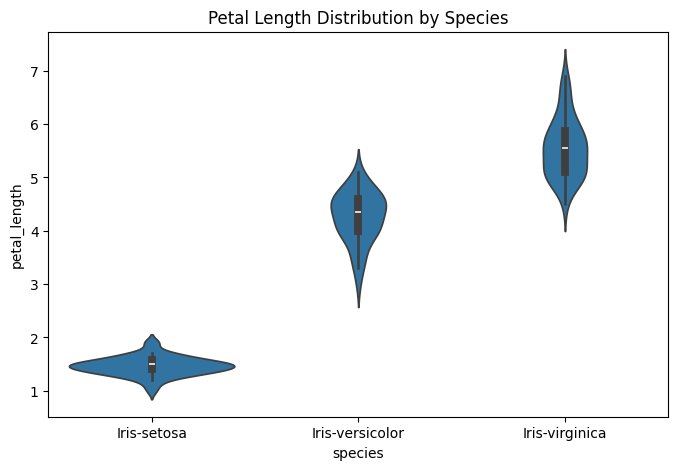

<Figure size 640x480 with 0 Axes>

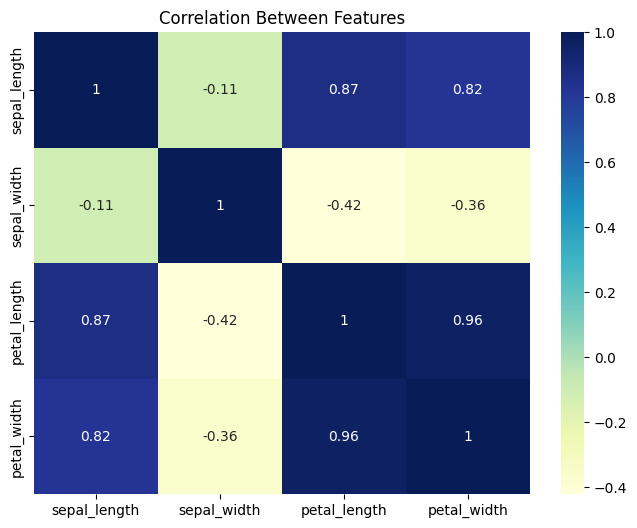

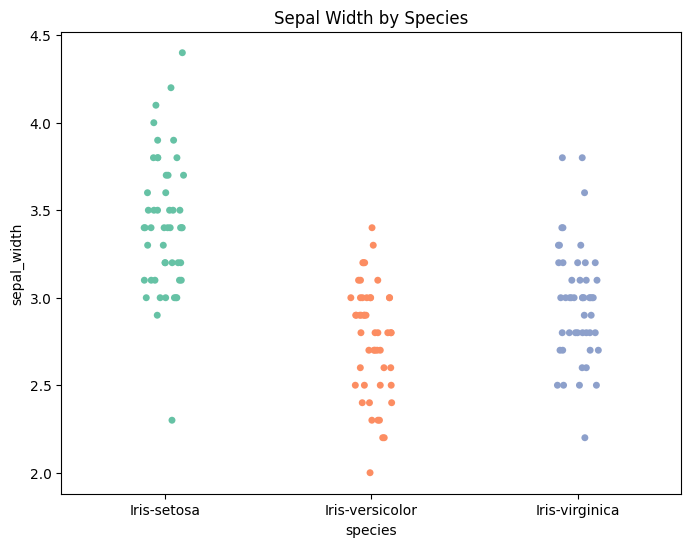

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv("IRIS.csv")
df.columns = [col.strip() for col in df.columns]
df["species"] = df["species"].str.strip()

plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x="species", y="petal_length")
plt.title("Petal Length Distribution by Species")
plt.show()

plt.suptitle("Feature Relationships by Species", y=1.02)
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df.drop("species", axis=1).corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Between Features")
plt.show()

plt.figure(figsize=(8, 6))
sns.stripplot(
    data=df,
    x="species",
    y="sepal_width",
    hue="species",
    palette="Set2",
    jitter=True,
    dodge=False,
    legend=False
)
plt.title("Sepal Width by Species")
plt.show()

X = df.drop("species", axis=1)
y = df["species"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Evaluating model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))